# Least Squares Approximation

We generate a random matrix $A$ and vector $b$, and find the least squares approximation to it (i.e., the vector $x$ such that $\lVert Ax-b \rVert_2$ is minimized).

In [39]:
import numpy as np
from time import perf_counter
from matplotlib import pyplot as plt
from tqdm import tqdm

In [40]:
def eval_sol(x, A, b):
    return np.linalg.norm(A @ x - b)

In [41]:
m = 1000
n = 500

run_count = 5

In [42]:
As = []
bs = []

In [43]:
det_errors = []
det_times = []

In [44]:
for j in range(run_count):
    A = np.random.randn(m,n)
    b = np.random.randn(m,1)
    
    As.append(A)
    bs.append(b)

    start = perf_counter()

    q,r = np.linalg.qr(A)
    qt = np.transpose(q)
    c = qt @ b

    rinv = np.linalg.inv(r)
    xls = rinv @ c

    det_error = eval_sol(xls, A, b)
    det_time = perf_counter() - start
    
    det_errors.append(det_error)
    det_times.append(det_time)

Here, we sample k standard Gaussian vectors, and keep the one that best approximates the least squares solution. When we compare the amount of time spent in computation and accuracy of the result, we see that the randomized method is superior (as long as we don't need extreme precision).

In [53]:
def RLS(A, b, num_samples):
    min(rx - c)
    return np.random.randn(n,1)

In [58]:
def calculate_statistics(domain):
    errors = []
    times = []

    for k in tqdm(domain):
#         print(f'Finding random least-squares approximation with {k} samples...')
    
        total_rand_error = 0
        total_rand_time = 0
        
        for j in range(run_count): # for each k, run the experiment `run_count` times and average the results
            
            start = perf_counter()
            rand_x = RLS(As[j], bs[j], k)
            rand_time = perf_counter() - start
            
            rand_error = eval_sol(rand_x, As[j], bs[j])

            total_rand_error += (rand_error - det_errors[j]) / det_errors[j]
            total_rand_time += rand_time / det_times[j]

        errors.append(total_rand_error * 100 / run_count)
        times.append(total_rand_time * 100 / run_count)
        
    return errors, times

In [59]:
def plot_stats(domain, errors, times):
    fig, ax = plt.subplots(figsize=(10,5))

    ax.set_xlabel('sample size')

    ax.plot(domain, errors, c='r', label='Error')
    ax.set_ylabel('relative error')

    twin_ax = ax.twinx()

    twin_ax.plot(domain, times, c='b', label='Time')
    twin_ax.set_ylabel('percent time elapsed')

    fig.legend(loc='upper right')

100%|██████████| 20/20 [00:00<00:00, 430.70it/s]


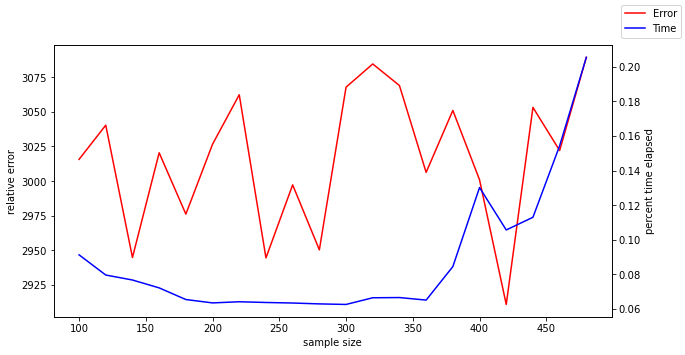

In [60]:
domain0 = np.arange(100, 500, step=20)
errors0, times0 = calculate_statistics(domain0)
plot_stats(domain0, errors0, times0)

100%|██████████| 30/30 [00:00<00:00, 516.38it/s]


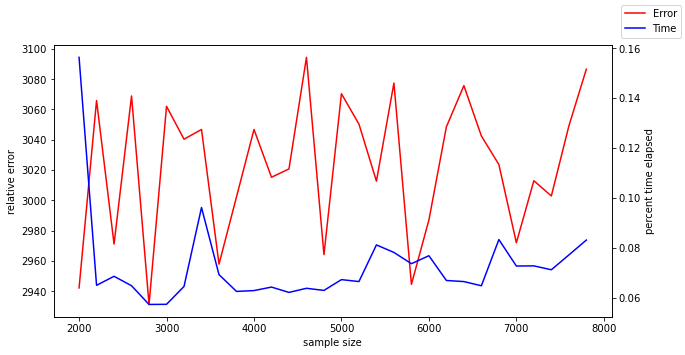

In [61]:
domain1 = np.arange(2000, 8000, step=200)
errors1, times1 = calculate_statistics(domain1)
plot_stats(domain1, errors1, times1)